#### PASCAL VOC 2012 데이터 다운로드 받기

In [2]:
# pascal voc 2012 데이터를 다운로드 후 /kaggle/working/data 디렉토리에 압축 해제
# DOWNLOAD시 약 3분정도 시간 소요. 아래 디렉토리가 잘 동작하지 않을 경우 https://web.archive.org/web/20140815141459/http://pascallin.ecs.soton.ac.uk/challenges/VOC/voc2012/VOCtrainval_11-May-2012.tar
!mkdir ./data

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_11-May-2012.tar -C /kaggle/working/data

--2021-07-04 04:22:33--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  78.1MB/s    in 25s     

2021-07-04 04:22:58 (76.8 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

VOCdevkit/
VOCdevkit/VOC2012/
VOCdevkit/VOC2012/Annotations/
VOCdevkit/VOC2012/Annotations/2007_000027.xml
VOCdevkit/VOC2012/Annotations/2007_000032.xml
VOCdevkit/VOC2012/Annotations/2007_000033.xml
VOCdevkit/VOC2012/Annotations/2007_000039.xml
VOCdevkit/VOC2012/Annotations/2007_000042.xml
VOCdevkit/VOC2012/Annotations/2007_000061.xml
VOCdevkit/VOC2012/Annotations/2007_000063.xml
VOCdevkit/VOC2012/Annotations/2007_000068.xml

In [3]:
!ls /kaggle/working/data/VOCdevkit/VOC2012
!ls /kaggle/working/data/VOCdevkit/VOC2012/JPEGImages | head -n 5

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject
2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg
ls: write error: Broken pipe


#### JPEGImages 디렉토리에 있는 임의의 이미지 보기 

img shape: (281, 500, 3)


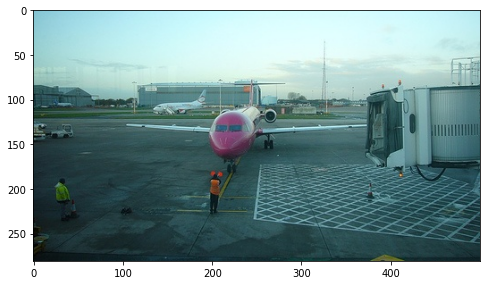

In [4]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 코랩 버전은 상대 경로를 사용하지 않습니다. /kaggle/working 디렉토리를 기준으로 절대 경로를 이용합니다. 
# default_dir 은 /kaggle/working/data 로 지정하고 os.path.join()으로 상세 파일/디렉토리를 지정합니다. 
default_dir = '/kaggle/working/data'
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()


#### Annotations 디렉토리에 있는 임의의 annotation 파일 보기

In [5]:
!cat /kaggle/working/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

#### SegmentationObject 디렉토리에 있는 있는 임의의 maksing 이미지 보기 

img shape: (281, 500, 3)


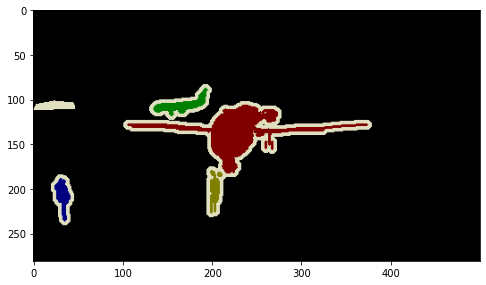

In [6]:

img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationObject/2007_000032.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

#### Annotation xml 파일에 있는 요소들을 파싱하여 접근하기
* ElementTree를 이용하여 XML 파싱(lxml 패키지는 이미 코랩에 설치됨. pip install lxml)

In [7]:
import os
import random

# kaggle 버전 절대경로 수정. 
VOC_ROOT_DIR ="/kaggle/working/data/VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

xml_files = os.listdir(ANNO_DIR)                       
print(xml_files[:5]); print(len(xml_files))

['2010_005696.xml', '2009_001453.xml', '2011_006576.xml', '2007_003991.xml', '2008_001577.xml']
17125


In [8]:
# !pip install lxml
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

# XML 파일을 Parsing 하여 Element 생성
tree = ET.parse(xml_file)
root = tree.getroot()

# image 관련 정보는 root의 자식으로 존재
image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):
    # object element의 자식 element에서 bndbox를 찾음. 
    xmlbox = obj.find('bndbox')
    # bndbox element의 자식 element에서 xmin,ymin,xmax,ymax를 찾고 이의 값(text)를 추출 
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)
    
    bndbox_pos = (x1, y1, x2, y2)
    class_name=obj.find('name').text
    object_dict={'class_name': class_name, 'bndbox_pos':bndbox_pos}
    objects_list.append(object_dict)

print('full_image_name:', full_image_name,'\n', 'image_size:', (image_width, image_height))

for object in objects_list:
    print(object)

    

full_image_name: /kaggle/working/data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg 
 image_size: (500, 281)
{'class_name': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}
{'class_name': 'person', 'bndbox_pos': (195, 180, 213, 229)}
{'class_name': 'person', 'bndbox_pos': (26, 189, 44, 238)}


#### Annotation내의 Object들의 bounding box 정보를 이용하여 Bounding box 시각화

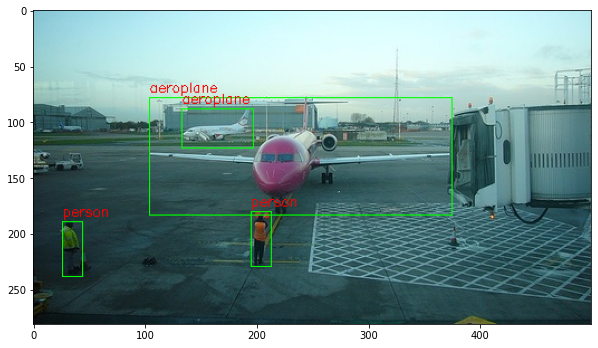

In [9]:
import cv2
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)

img = cv2.imread(full_image_name)
# opencv의 rectangle()는 인자로 들어온 이미지 배열에 그대로 사각형을 그려주므로 별도의 이미지 배열에 그림 작업 수행. 
draw_img = img.copy()
# OpenCV는 RGB가 아니라 BGR이므로 빨간색은 (0, 0, 255)
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    
    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name=obj.find('name').text
    
    # draw_img 배열의 좌상단 우하단 좌표에 녹색으로 box 표시 
    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
    # draw_img 배열의 좌상단 좌표에 빨간색으로 클래스명 표시
    cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)